# **Functional API**

In [1]:
import tensorflow as tf
from tensorflow import keras

input_  = keras.layers.Input(shape=10, name="inpute")
hidden1 = keras.layers.Dense(30, activation="relu", name="hidden1")(input_)
hidden2 = keras.layers.Dense(30, activation="relu", name="hidden2")(hidden1)

concat = keras.layers.Concatenate(name="concat")([input_, hidden2])

output = keras.layers.Dense(1, name="output")(concat)
model  = keras.Model(inputs=[input_], outputs=[output])

print(model.summary())

from tensorflow.keras.utils import plot_model
plot_model(model)


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inpute (InputLayer)             [(None, 10)]         0                                            
__________________________________________________________________________________________________
hidden1 (Dense)                 (None, 30)           330         inpute[0][0]                     
__________________________________________________________________________________________________
hidden2 (Dense)                 (None, 30)           930         hidden1[0][0]                    
__________________________________________________________________________________________________
concat (Concatenate)            (None, 40)           0           inpute[0][0]                     
                                                                 hidden2[0][0]                

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 hidden1 (Dense)                (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 hidden2 (Dense)                (None, 30)           930         ['hidden1[0][0]']                
                                                                                            

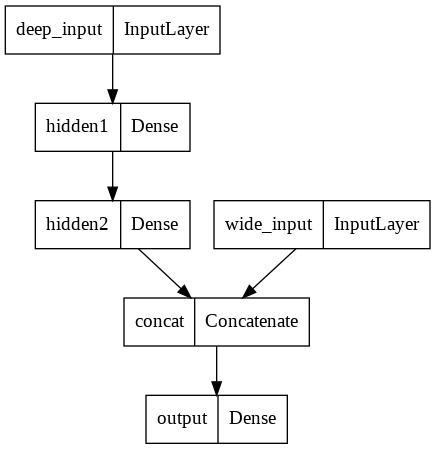

In [3]:
import tensorflow as tf
from tensorflow import keras

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

hidden1 = keras.layers.Dense(30, activation="relu", name="hidden1")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu", name="hidden2")(hidden1)

concat   = keras.layers.concatenate([input_A, hidden2], name="concat")

output = keras.layers.Dense(1, name="output")(concat)
model  = keras.Model(inputs=[input_A, input_B], outputs=[output])

print(model.summary())

from tensorflow.keras.utils import plot_model
plot_model(model)


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 hidden1 (Dense)                (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 hidden2 (Dense)                (None, 30)           930         ['hidden1[0][0]']                
                                                                                            

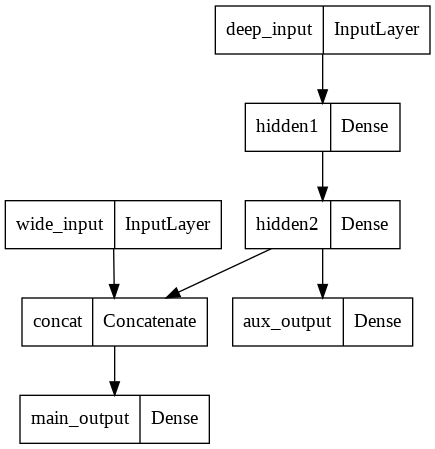

In [4]:
import tensorflow as tf
from tensorflow import keras

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

hidden1 = keras.layers.Dense(30, activation="relu", name="hidden1")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu", name="hidden2")(hidden1)

concat = keras.layers.concatenate([input_A, hidden2], name="concat")

output     = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model      = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

"""
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")
history = model.fit([X_train_A, X_train_B], [y_train_A, y_train_B], epochs=20,  
                  validation_data=([X_valid_A, X_valid_B], [y_valid_A, y_valid_B]))

total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test_A, y_test_B])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
"""

print(model.summary())

from tensorflow.keras.utils import plot_model
plot_model(model)


# **CNN Architectures**
In this notebook, I will show you how to implement a complex  Convolutional Neural Network architecture with the tensorflow.keras Functional API. 

The Keras functional API is a way to create models that are more flexible than the tf.keras.Sequential API. The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.


# **Legend**
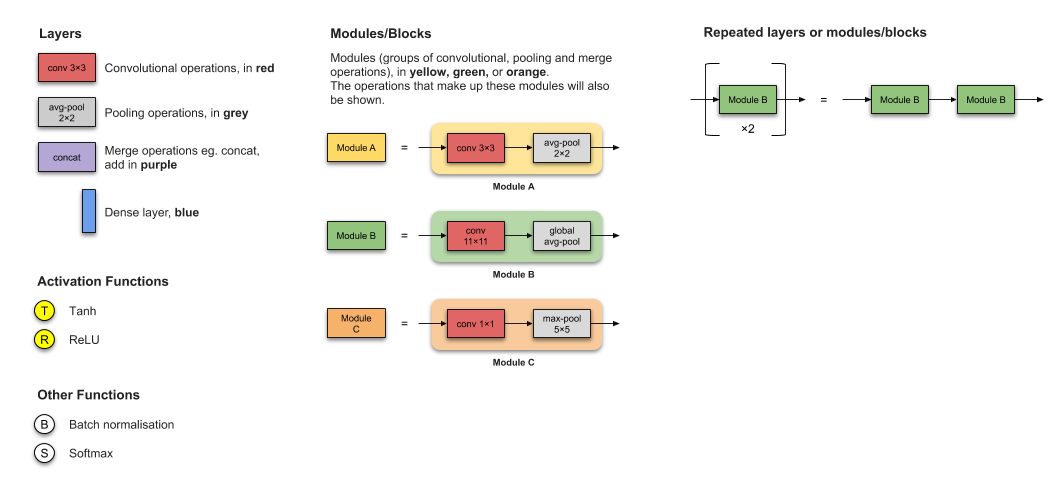

# **Implementation of AlexNet**
We build AlexNet from the original paper (we will use the same hyperparameters): [ImageNet Classification with Deep Convolutional Neural Networks](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)

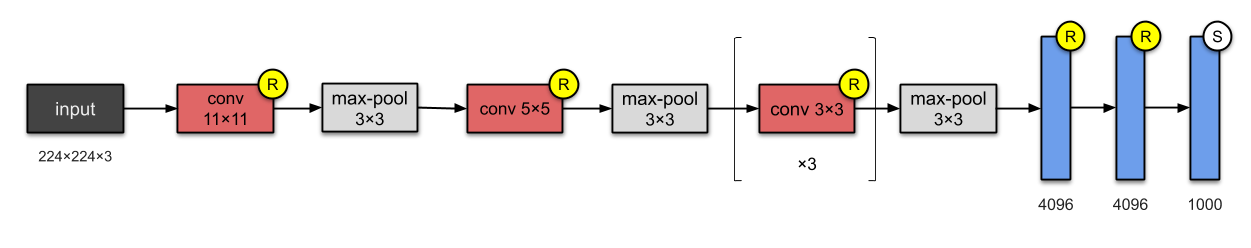

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 56, 56, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 56, 56, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024  

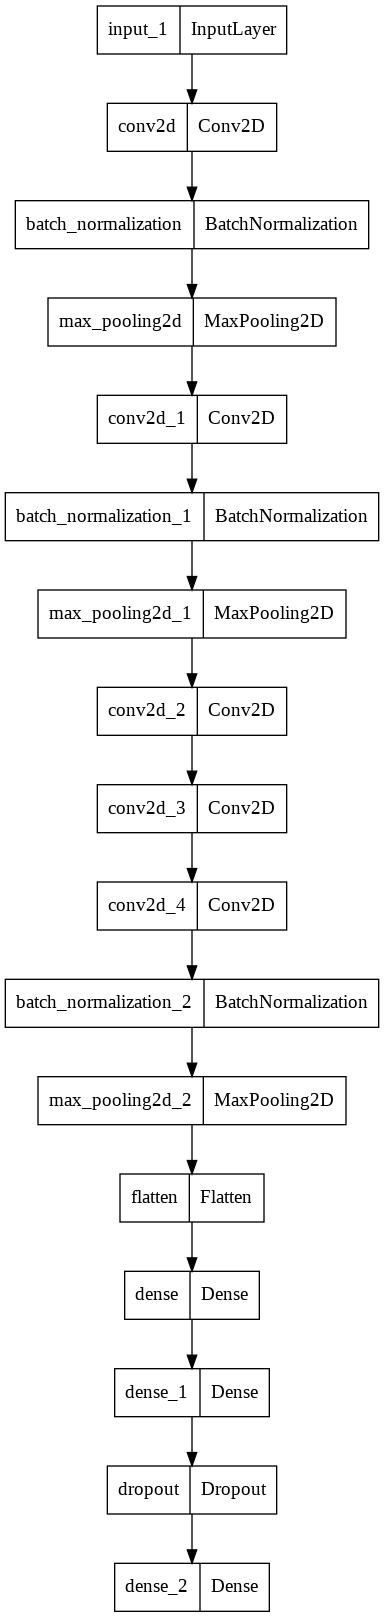

In [ ]:
#  Imports
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, \
    MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras import Model

# Input
input = Input(shape=(224, 224, 3))

# 1st block
B1 = Conv2D(filters=96,
          kernel_size=11,
          strides=4,
          padding='same',
          activation='relu')(input)  

B1 = BatchNormalization()(B1)
B1 = MaxPool2D(pool_size=3, strides=2)(B1)

# 2nd block
B2 = Conv2D(filters=256,
          kernel_size=5,
          padding='same',
          activation='relu')(B1)

B2 = BatchNormalization()(B2)
B2 = MaxPool2D(pool_size=3, strides=2)(B2)

# 3th block * 3
B3 = Conv2D(filters=384,
          kernel_size=3,
          padding='same',
          activation='relu')(B2)

B3 = Conv2D(filters=384,
          kernel_size=3,
          padding='same',
          activation='relu')(B3)

B3 = Conv2D(filters=256,
          kernel_size=3,
          padding='same',
          activation='relu')(B3)  

B3 = BatchNormalization()(B3)
B3 = MaxPool2D(pool_size=3, strides=2)(B3)

# Dense layers
DL = Flatten()(B3)
DL = Dense(units=4096, activation='relu')(DL)
DL = Dense(units=4096, activation='relu')(DL)
DL = Dropout(rate=0.5)(DL)

# Output layer
output = Dense(units=1000, activation='softmax')(DL)

# Model
AlexNet_model = Model(inputs=input, outputs=output)

print(AlexNet_model.summary())

from tensorflow.keras.utils import plot_model
plot_model(AlexNet_model)


# **Implementation of GoogLeNet**
Original paper: [Going Deeper with Convolutions](https://arxiv.org/abs/1409.4842)

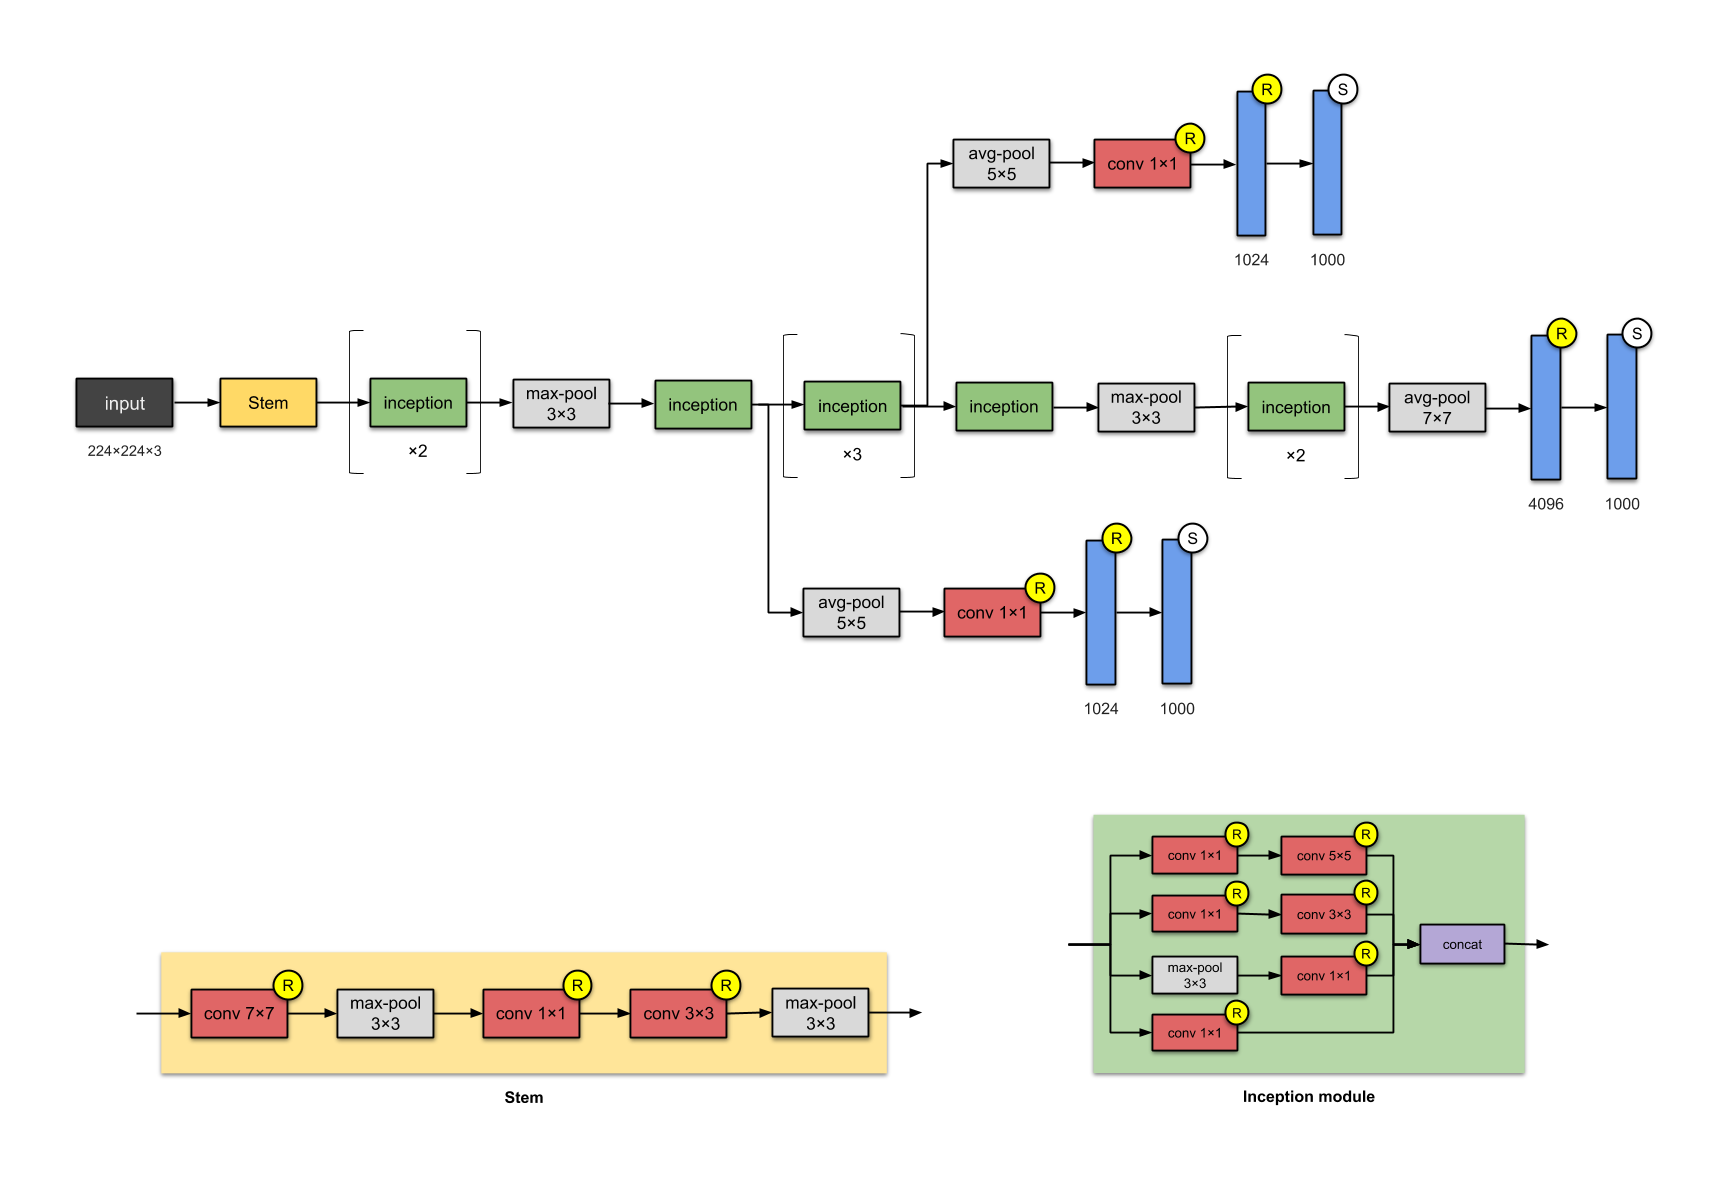

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 112, 112, 64  9472        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 56, 56, 64)  0           ['conv2d_5[0][0]']               
                                                                                            

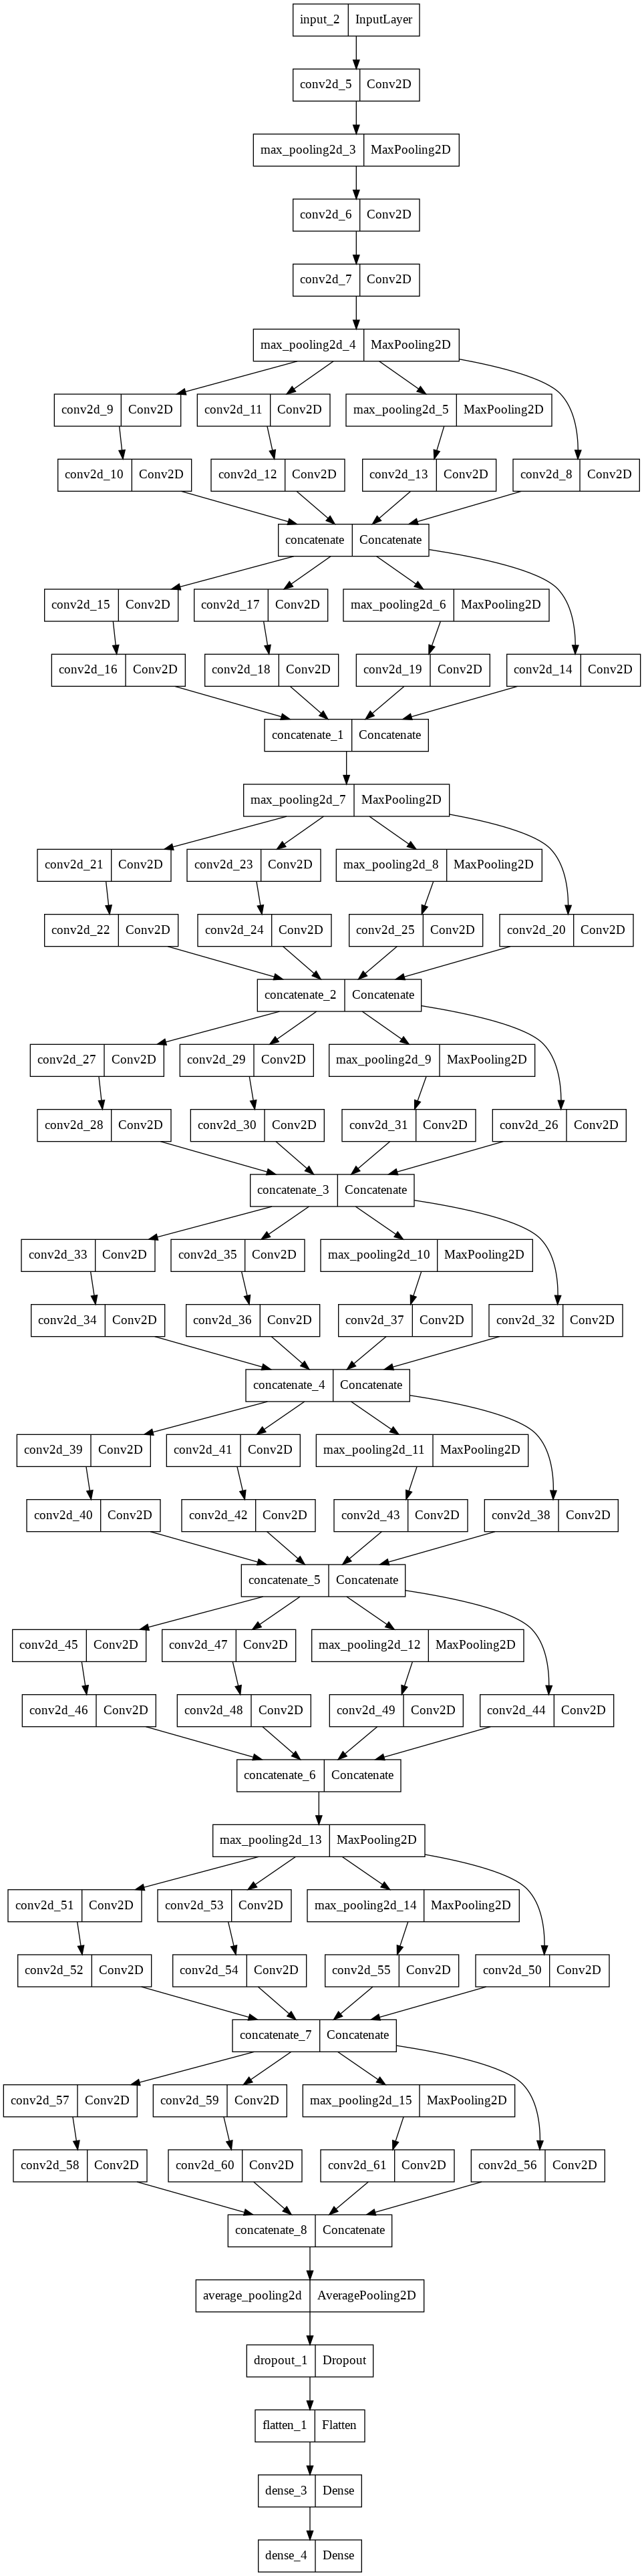

In [ ]:
# Imports
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Concatenate, \
    AvgPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model

# Stem block
def stem_block(input) :
    sb = Conv2D(filters=64, kernel_size=7, strides=2, padding='same', 
                activation='relu')(input)
    sb = MaxPool2D(pool_size=3, strides=2, padding='same')(sb)
    sb = Conv2D(filters=64, kernel_size=1, activation='relu')(sb)
    sb = Conv2D(filters=192, kernel_size=3, padding='same', 
                activation='relu')(sb)
    sb = MaxPool2D(pool_size=3, strides=2)(sb)
    return sb

# Inception block
# You can build a simple model to visualize the result of this function 
# to test the Inception block.
def inception_block(x, filters):

    c1 = Conv2D(filters=filters[0], kernel_size=1, activation='relu')(x)

    c2 = Conv2D(filters=filters[1], kernel_size=1, activation='relu')(x)
    c2 = Conv2D(filters=filters[2], kernel_size=3, padding='same', 
                activation='relu')(c2)

    c3 = Conv2D(filters=filters[3], kernel_size=1, activation='relu')(x)
    c3 = Conv2D(filters=filters[4], kernel_size=5, padding='same', 
                activation='relu')(c3)

    mp = MaxPool2D(pool_size=3, strides=1, padding='same')(x)
    c4 = Conv2D(filters=filters[5], kernel_size=1, activation='relu')(mp)

    output = Concatenate()([c1, c2, c3, c4])
    return output

# Input
input = Input(shape=(224, 224, 3))

# Blocks
my_model = stem_block(input)

my_model = inception_block(my_model, filters=[64, 96, 128, 16, 32, 32])
my_model = inception_block(my_model, filters=[128, 128, 192, 32, 96, 64])
my_model = MaxPool2D(pool_size=3, strides=2, padding='same')(my_model)

my_model = inception_block(my_model, filters=[192, 96, 208, 16, 48, 64])
my_model = inception_block(my_model, filters=[160, 112, 224, 24, 64, 64])
my_model = inception_block(my_model, filters=[128, 128, 256, 24, 64, 64])
my_model = inception_block(my_model, filters=[112, 144, 288, 32, 64, 64])
my_model = inception_block(my_model, filters=[256, 160, 320, 32, 128, 128])
my_model = MaxPool2D(pool_size=3, strides=2, padding='same')(my_model)

my_model = inception_block(my_model, filters=[256, 160, 320, 32, 128, 128])
my_model = inception_block(my_model, filters=[384, 192, 384, 48, 128, 128])
my_model = AvgPool2D(pool_size=7, strides=1)(my_model)
my_model = Dropout(rate=0.4)(my_model)

# Dense layers
my_model = Flatten()(my_model)
my_model = Dense(units=4096, activation='relu')(my_model)

# Output layer
output = Dense(units=1000, activation='softmax')(my_model)

# Model
GoogLeNet_model = Model(inputs=input, outputs=output)

print(GoogLeNet_model.summary())

from tensorflow.keras.utils import plot_model
plot_model(GoogLeNet_model)


# **Implementation of Xception**
Original paper: [Xception: Deep Learning with Depthwise Separable Convolutions](https://arxiv.org/abs/1610.02357)

**A Basic Introduction to** [Separable Convolutions](https://towardsdatascience.com/a-basic-introduction-to-separable-convolutions-b99ec3102728)

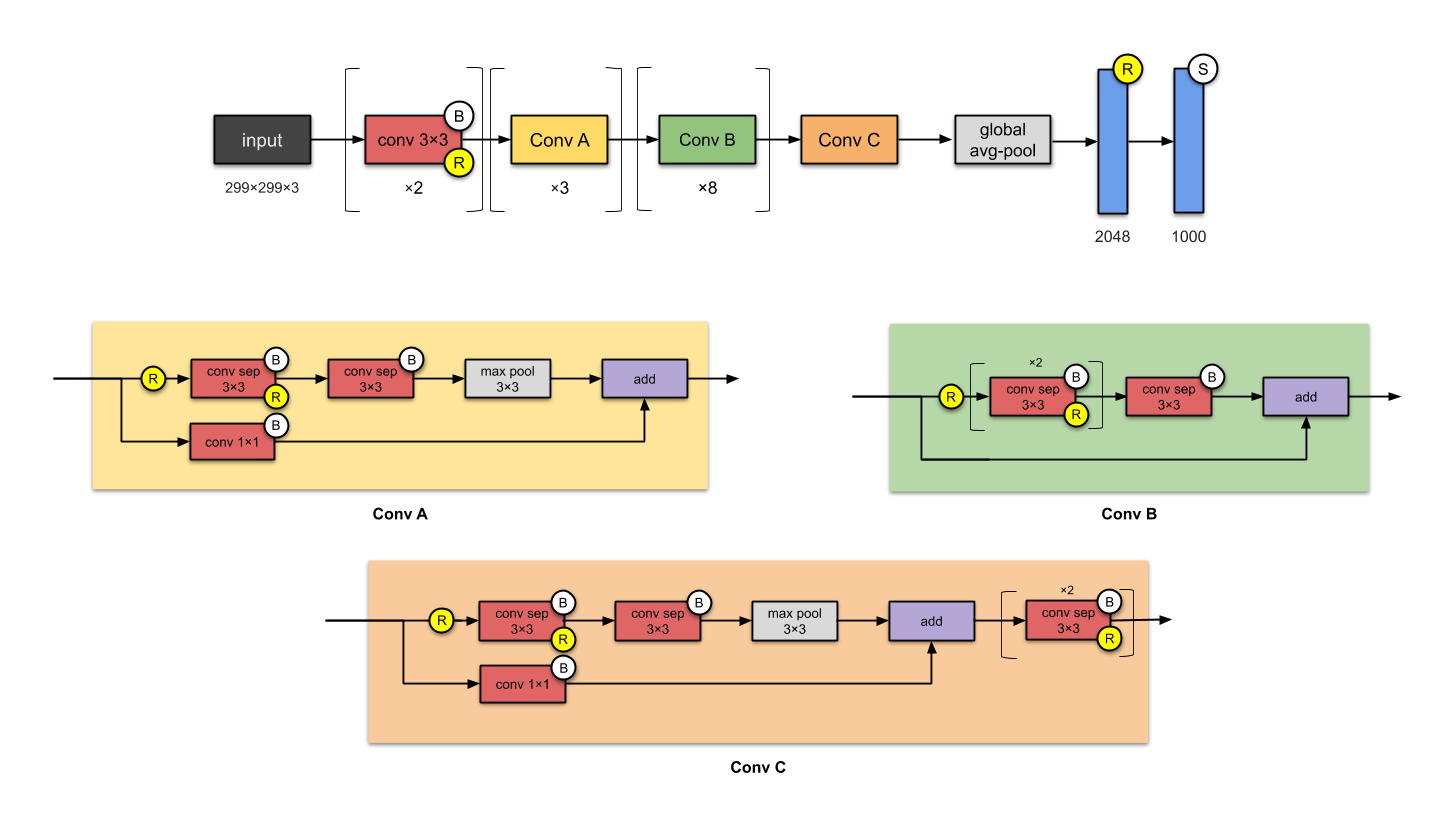

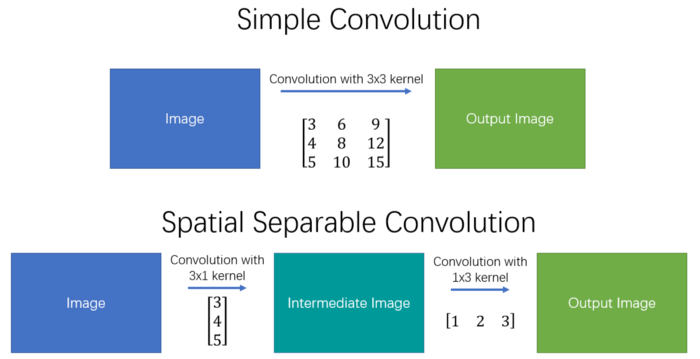

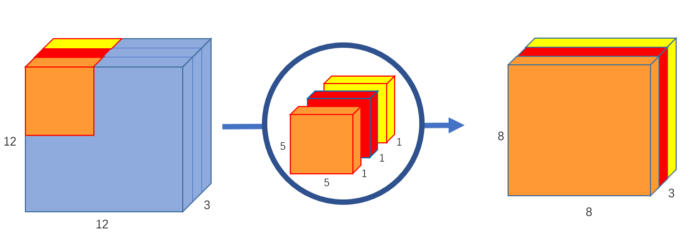

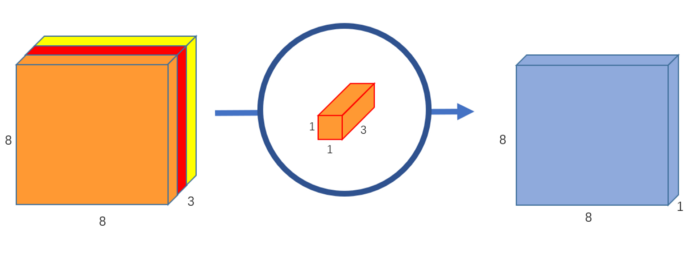

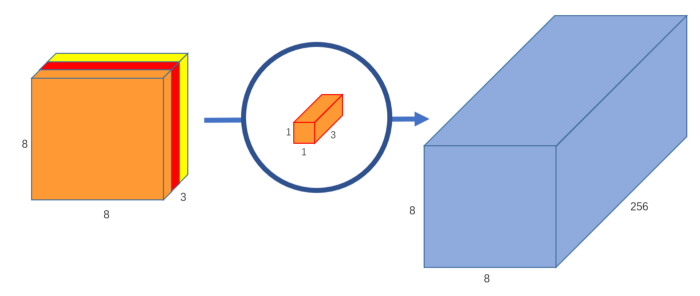

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 16)]         0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 32)]         0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 8)            136         ['input_3[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 8)            264         ['input_4[0][0]']                
                                                                                            

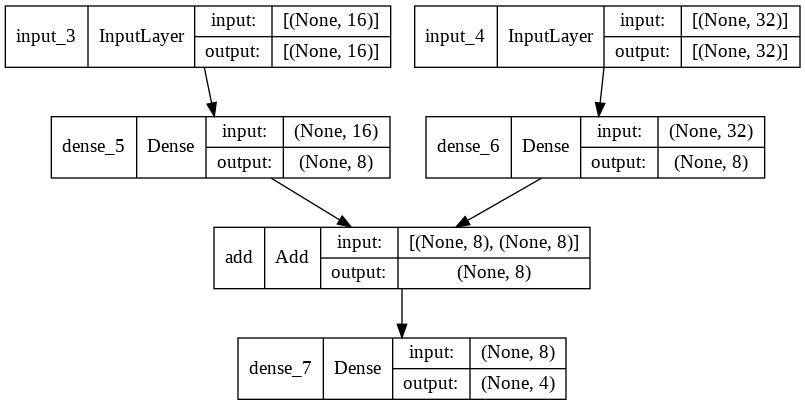

In [ ]:
# layers.Add
import keras

input1 = keras.layers.Input(shape=(16,))
x1 = keras.layers.Dense(8, activation='relu')(input1)

input2 = keras.layers.Input(shape=(32,))
x2 = keras.layers.Dense(8, activation='relu')(input2)
"""
It takes as input a list of tensors, all of the same shape, 
and returns a single tensor (also of the same shape).
"""
added = keras.layers.Add()([x1, x2]) 

out = keras.layers.Dense(4)(added)
model = keras.models.Model(inputs=[input1, input2], outputs=out)

print(model.summary())

from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_62 (Conv2D)             (None, 150, 150, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_3 (BatchNo  (None, 150, 150, 32  128        ['conv2d_62[0][0]']              
 rmalization)                   )                                                           

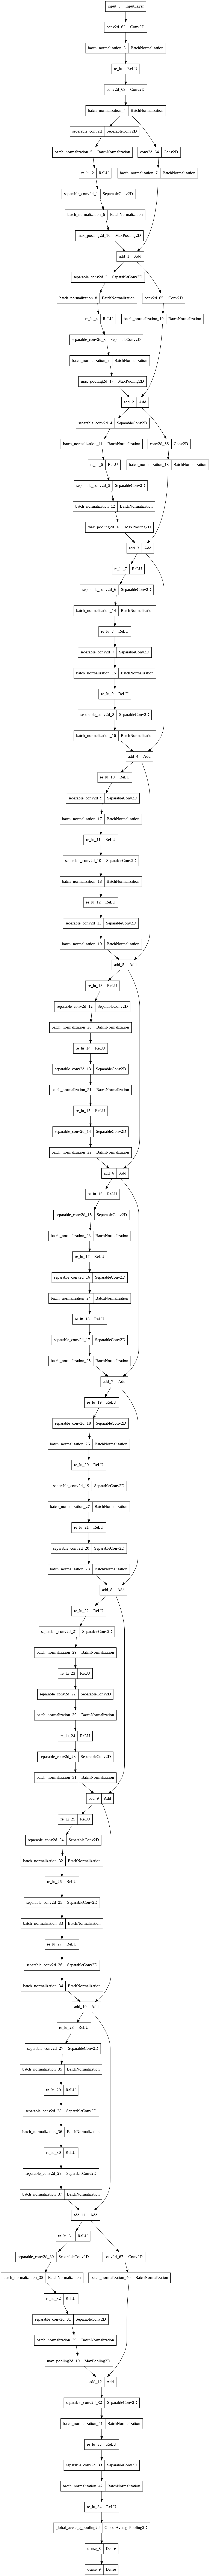

In [ ]:
# Imports
from tensorflow.keras.layers import Input, Conv2D, SeparableConv2D, Add, \
    Dense, BatchNormalization, ReLU, MaxPool2D, GlobalAvgPool2D
from tensorflow.keras import Model

# ------------------------------------------------------------------------------
# ------------------------------------------------------------------------------
def conv_bn(x, filters, kernel_size, strides=1):
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               strides=strides,
               padding='same',
               use_bias=False)(x)
    x = BatchNormalization()(x)
    return x

def sep_bn(x, filters, kernel_size, strides=1):
    x = SeparableConv2D(filters=filters,
                        kernel_size=kernel_size,
                        strides=strides,
                        padding='same',
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    return x

def conv_A(tensor, filter):
    x = ReLU()(tensor)
    x = sep_bn(tensor, filters=filter, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters=filter, kernel_size=3)
    x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

    tensor = conv_bn(tensor, filters=filter, kernel_size=1, strides=2)

    x = Add()([tensor, x])
    return x

def conv_B(tensor):
    x = ReLU()(tensor)
    x = sep_bn(x, filters=728, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters=728, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters=728, kernel_size=3)

    tensor = Add()([tensor, x])
    return tensor

def conv_C(tensor):
    x = ReLU()(tensor)
    x = sep_bn(x, filters=728, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters=1024, kernel_size=3)
    x = MaxPool2D(3, strides=2, padding='same')(x)

    tensor = conv_bn(tensor, filters=1024, kernel_size=1, strides=2)
    x = Add()([tensor, x])

    x = sep_bn(x, filters=1536, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters=2048, kernel_size=3)
    x = ReLU()(x)
    x = GlobalAvgPool2D()(x)
    return x
# ------------------------------------------------------------------------------
# ------------------------------------------------------------------------------
# Input
input = Input(shape=(299, 299, 3))

# Blocks
my_model = conv_bn(input, filters=32, kernel_size=3, strides=2)
my_model = ReLU()(my_model)
my_model = conv_bn(my_model, filters=64, kernel_size=3)

# conv A
my_model = conv_A(my_model, 128)
my_model = conv_A(my_model, 256)
my_model = conv_A(my_model, 728)

# conv B
my_model = conv_B(my_model)
my_model = conv_B(my_model)
my_model = conv_B(my_model)
my_model = conv_B(my_model)
my_model = conv_B(my_model)
my_model = conv_B(my_model)
my_model = conv_B(my_model)
my_model = conv_B(my_model)

# conv C
my_model = conv_C(my_model)

# Dense layers
my_model = Dense(units=2048, activation='relu')(my_model)

# Output layer
output = Dense(units=1000, activation='softmax')(my_model)

# Model
Xception_model = Model(inputs=input, outputs=output)

print(Xception_model.summary())

from tensorflow.keras.utils import plot_model
plot_model(Xception_model)



# **Example**

11501568/11490434 [==============================] - 0s 0us/step
X_train shape =  (60000, 28, 28)  X_test shape =  (10000, 28, 28)


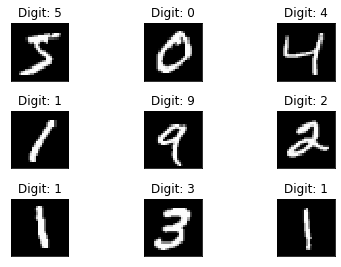

In [ ]:
# Building an Image Classifier Using the Functional API
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Using Keras to load the dataset
# Every image is represented as a 28 × 28 array 
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print("X_train shape = ",X_train.shape," X_test shape = ",X_test.shape)

fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation="none")
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

# Scale the pixel intensities down to the [0,1] range by dividing them by 255.0 
# (this also converts them to floats).
X_train = X_train / 255.0
X_test  = X_test / 255.0


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_62 (Conv2D)             (None, 28, 28, 64)   576         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_3 (BatchNo  (None, 28, 28, 64)  256         ['conv2d_62[0][0]']              
 rmalization)                                                                                     
                                                                                                  
 conv2d_63 (Conv2D)             (None, 28, 28, 128)  73728       ['batch_normalization_3[0][

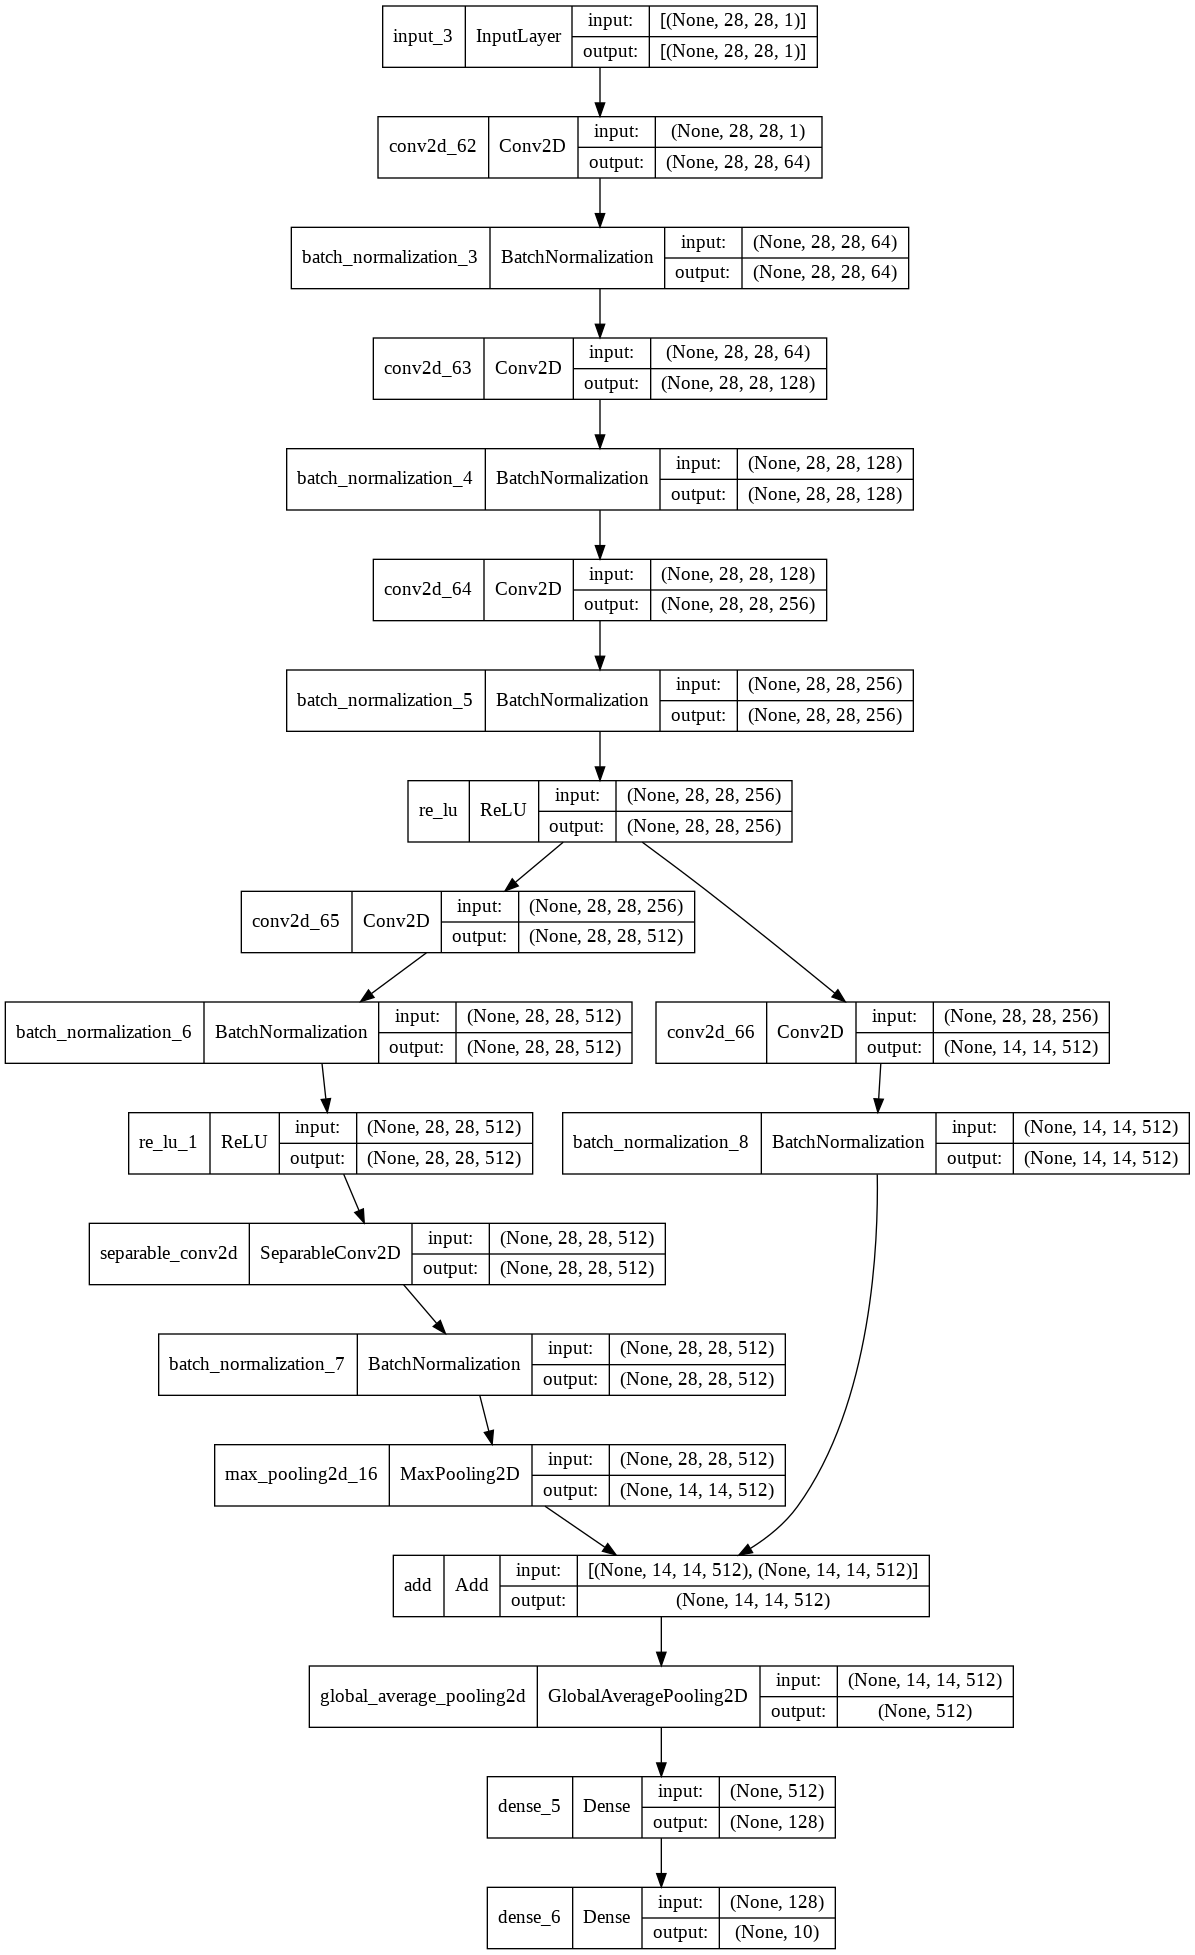

In [ ]:
# My Model

# Imports
from tensorflow.keras.layers import Input, Conv2D, SeparableConv2D, Add, \
    Dense, BatchNormalization, ReLU, MaxPool2D, GlobalAvgPool2D, Flatten
from tensorflow.keras import Model

# ------------------------------------------------------------------------------
# ------------------------------------------------------------------------------
def conv_bn(x, filters, kernel_size, strides=1):
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               strides=strides,
               padding='same',
               use_bias=False)(x)
    x = BatchNormalization()(x)
    return x

def sep_bn(x, filters, kernel_size, strides=1):
    x = SeparableConv2D(filters=filters,
                        kernel_size=kernel_size,
                        strides=strides,
                        padding='same',
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    return x

def my_block(x, filter):
    tensor = ReLU()(x)
    x = conv_bn(tensor, filters=filter, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters=filter, kernel_size=3)
    x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

    tensor = conv_bn(tensor, filters=filter, kernel_size=1, strides=2)

    x = Add()([tensor, x])
    x = GlobalAvgPool2D()(x)
    return x
# ------------------------------------------------------------------------------
# ------------------------------------------------------------------------------

# Input
input = Input(shape=(28, 28, 1))

# Blocks
my_model = conv_bn(input, filters=64, kernel_size=3, strides=1)
my_model = conv_bn(my_model, filters=128, kernel_size=3, strides=1)
my_model = conv_bn(my_model, filters=256, kernel_size=3, strides=1)

# my_block
my_model = my_block(my_model, 512)

# Dense layers
my_model = Dense(units=128, activation='relu')(my_model)

# Output layer
output = Dense(units=10, activation='softmax')(my_model)

# Model
my_model = Model(inputs=input, outputs=output)

print(my_model.summary())

from tensorflow.keras.utils import plot_model
plot_model(my_model, show_shapes=True)


In [ ]:
# Compiling the model
optimizer = keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
my_model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Training and evaluating the model
history = my_model.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 [==============================] - 200s 124ms/step - loss: 0.4388 - accuracy: 0.8589 - val_loss: 0.4364 - val_accuracy: 0.8660
Epoch 2/5
1500/1500 [==============================] - 185s 124ms/step - loss: 0.1744 - accuracy: 0.9503 - val_loss: 0.2002 - val_accuracy: 0.9500
Epoch 3/5
1500/1500 [==============================] - 176s 118ms/step - loss: 0.1363 - accuracy: 0.9621 - val_loss: 0.3025 - val_accuracy: 0.9238
Epoch 4/5
1500/1500 [==============================] - 185s 123ms/step - loss: 0.1224 - accuracy: 0.9676 - val_loss: 0.3921 - val_accuracy: 0.9006
Epoch 5/5
1500/1500 [==============================] - 175s 117ms/step - loss: 0.1170 - accuracy: 0.9681 - val_loss: 0.2245 - val_accuracy: 0.9374


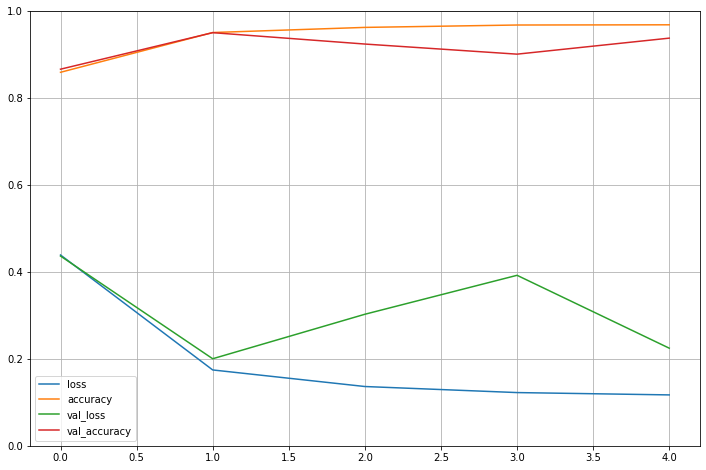

313/313 [==============================] - 11s 35ms/step - loss: 0.2510 - accuracy: 0.9326
Loss     :  0.25099989771842957
accuracy :  0.9326000213623047


In [ ]:
# plot the learning curves

import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Evaluate the model
model_evaluate = my_model.evaluate(X_test, y_test)
print("Loss     : ",model_evaluate[0])
print("accuracy : ",model_evaluate[1])


Classification report : 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       980
           1       0.84      0.99      0.91      1135
           2       0.94      0.85      0.89      1032
           3       0.98      0.96      0.97      1010
           4       1.00      0.86      0.93       982
           5       0.81      0.99      0.89       892
           6       0.99      0.95      0.97       958
           7       0.98      0.85      0.91      1028
           8       0.90      0.99      0.94       974
           9       0.97      0.91      0.94      1009

    accuracy                           0.93     10000
   macro avg       0.94      0.93      0.93     10000
weighted avg       0.94      0.93      0.93     10000

Confusion matrix : 



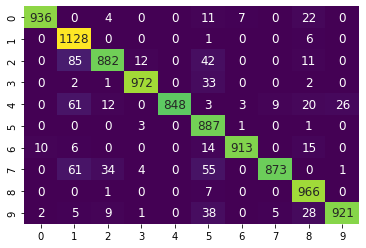

Normalized confusion matrix : 



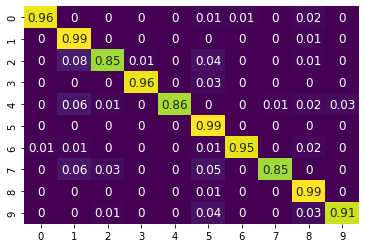

In [ ]:
# Confusion Matrix
y_pred = my_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

class_names = ["0", "1", "2", "3", "4","5", "6", "7", "8", "9"]

# Compute classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report : \n",classification_report(y_test, y_pred, target_names = class_names))

# Function to draw confusion matrix
import seaborn as sns
def draw_confusion_matrix(true, preds, normalize=None):
  # Compute confusion matrix
  conf_matx = confusion_matrix(true, preds, normalize = normalize)
  conf_matx = np.round(conf_matx, 2)
  # print(conf_matx)

  # plt.subplots(figsize=(14,8))
  sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12},fmt="g", cbar=False, cmap="viridis")
  plt.show()

print("Confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred)

print("Normalized confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred,"true")

# Make predictions
# predicted = model.predict(X_new)



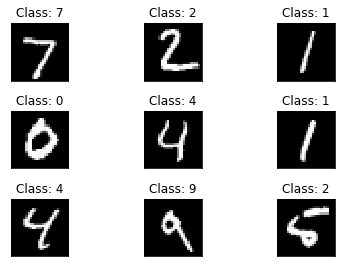

In [ ]:
# Results
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_test[i], cmap='gray', interpolation='none')
  title = "Class: "+class_names[int(y_pred[i])]
  plt.title(title)
  plt.xticks([])
  plt.yticks([])
  

# **3 ways to create a Keras model with TensorFlo(Sequential, Functional, and Model subclassing)**

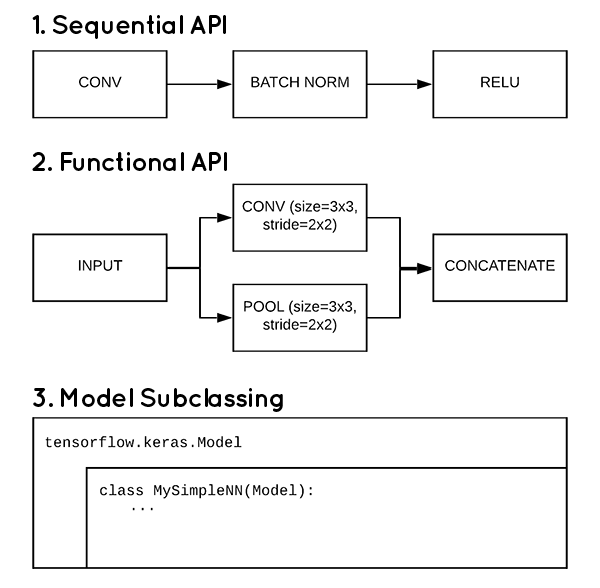

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_73 (Conv2D)             (None, 112, 112, 64  9472        ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_21 (MaxPooling2D  (None, 56, 56, 64)  0           ['conv2d_73[0][0]']              
 )                                                                                          

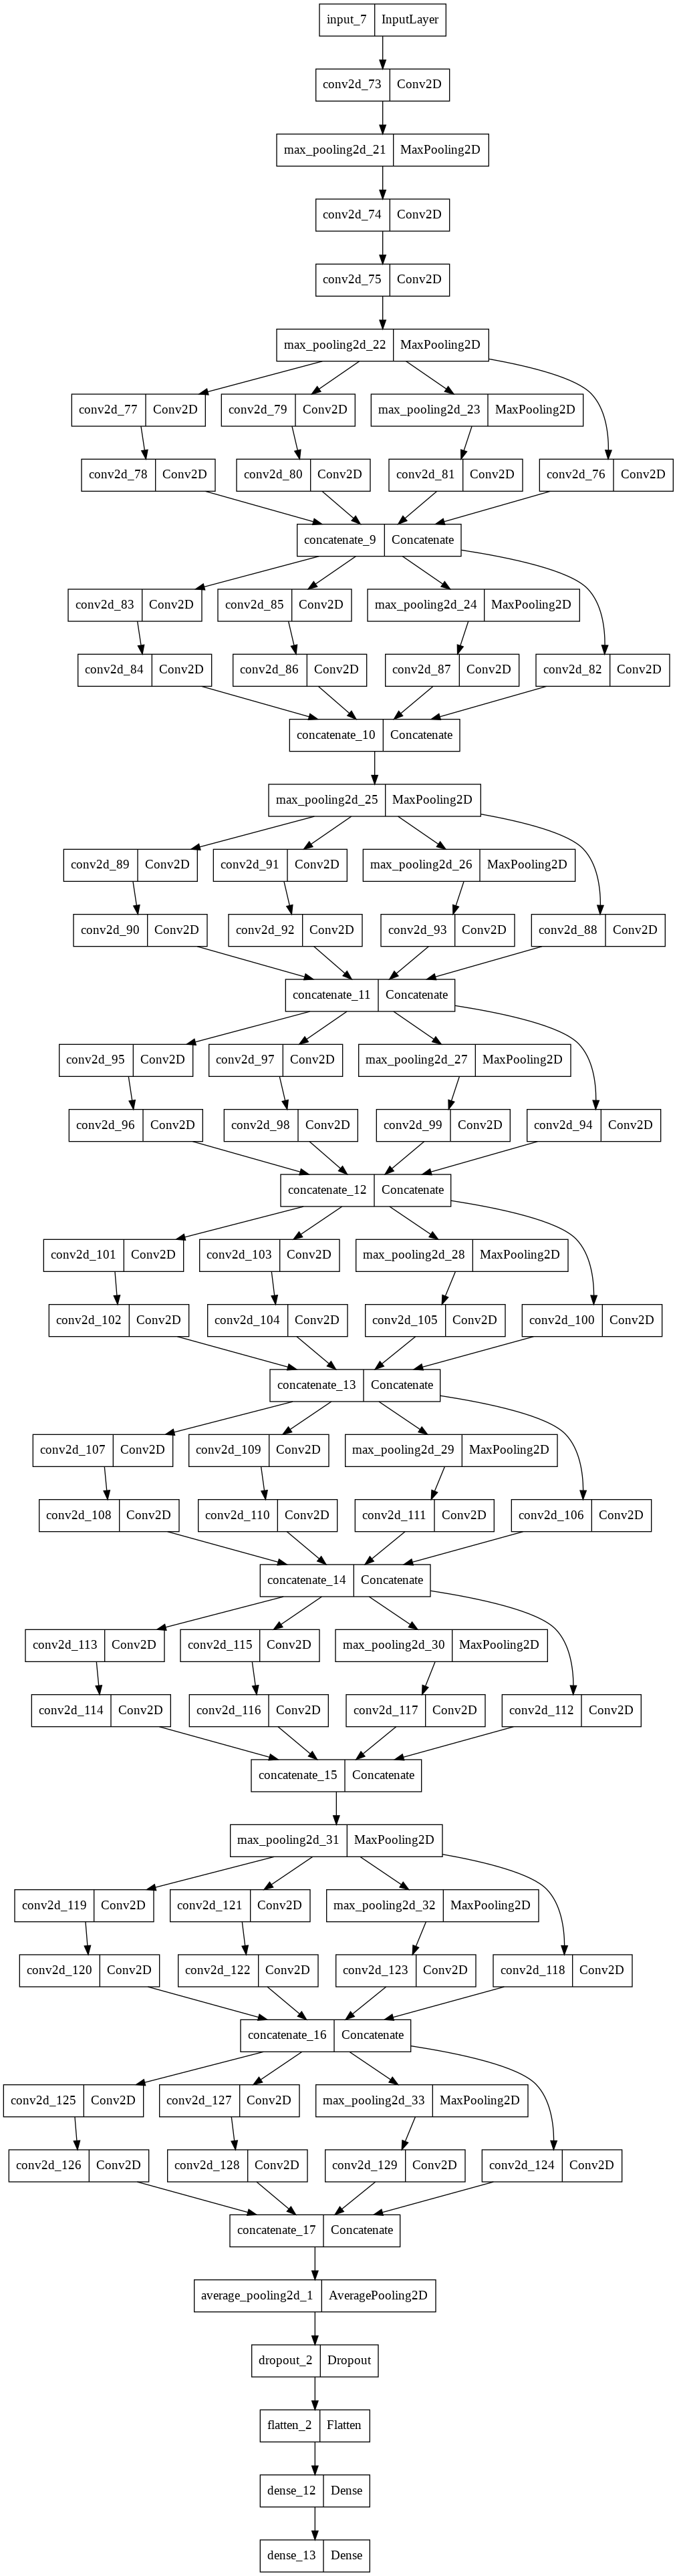

In [ ]:
# Imports
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Concatenate, \
    AvgPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model

#-------------------------------------------------------------------------------
def GoogLeNet(H, W, C):
  #-----------------------------------------------------------------------------
  # Stem block
  def stem_block(input) :
    sb = Conv2D(filters=64, kernel_size=7, strides=2, padding='same', 
                activation='relu')(input)
    sb = MaxPool2D(pool_size=3, strides=2, padding='same')(sb)
    sb = Conv2D(filters=64, kernel_size=1, activation='relu')(sb)
    sb = Conv2D(filters=192, kernel_size=3, padding='same', 
                activation='relu')(sb)
    sb = MaxPool2D(pool_size=3, strides=2)(sb)
    return sb
  #-----------------------------------------------------------------------------
  # Inception block
  # You can build a simple model to visualize the result of this function 
  # to test the Inception block.
  def inception_block(x, filters):

    c1 = Conv2D(filters=filters[0], kernel_size=1, activation='relu')(x)

    c2 = Conv2D(filters=filters[1], kernel_size=1, activation='relu')(x)
    c2 = Conv2D(filters=filters[2], kernel_size=3, padding='same', 
                activation='relu')(c2)

    c3 = Conv2D(filters=filters[3], kernel_size=1, activation='relu')(x)
    c3 = Conv2D(filters=filters[4], kernel_size=5, padding='same', 
                activation='relu')(c3)

    mp = MaxPool2D(pool_size=3, strides=1, padding='same')(x)
    c4 = Conv2D(filters=filters[5], kernel_size=1, activation='relu')(mp)

    output = Concatenate()([c1, c2, c3, c4])
    return output

  #-----------------------------------------------------------------------------
  # Input
  input = Input(shape=(H, W, C))

  # Blocks
  my_model = stem_block(input)

  my_model = inception_block(my_model, filters=[64, 96, 128, 16, 32, 32])
  my_model = inception_block(my_model, filters=[128, 128, 192, 32, 96, 64])
  my_model = MaxPool2D(pool_size=3, strides=2, padding='same')(my_model)

  my_model = inception_block(my_model, filters=[192, 96, 208, 16, 48, 64])
  my_model = inception_block(my_model, filters=[160, 112, 224, 24, 64, 64])
  my_model = inception_block(my_model, filters=[128, 128, 256, 24, 64, 64])
  my_model = inception_block(my_model, filters=[112, 144, 288, 32, 64, 64])
  my_model = inception_block(my_model, filters=[256, 160, 320, 32, 128, 128])
  my_model = MaxPool2D(pool_size=3, strides=2, padding='same')(my_model)

  my_model = inception_block(my_model, filters=[256, 160, 320, 32, 128, 128])
  my_model = inception_block(my_model, filters=[384, 192, 384, 48, 128, 128])
  my_model = AvgPool2D(pool_size=7, strides=1)(my_model)
  my_model = Dropout(rate=0.4)(my_model)

  # Dense layers
  my_model = Flatten()(my_model)
  my_model = Dense(units=4096, activation='relu')(my_model)

  # Output layer
  output = Dense(units=1000, activation='softmax')(my_model)

  # Model
  GoogLeNet_model = Model(inputs=input, outputs=output)

  return GoogLeNet_model

#-------------------------------------------------------------------------------

GoogLeNet_model = GoogLeNet(224, 224, 3)
print(GoogLeNet_model.summary())

from tensorflow.keras.utils import plot_model
plot_model(GoogLeNet_model)


Epoch 1/10
750/750 [==============================] - 5s 4ms/step - loss: 1.5400 - accuracy: 0.4800 - val_loss: 0.5848 - val_accuracy: 0.8572
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.7697 - accuracy: 0.7571 - val_loss: 0.3685 - val_accuracy: 0.8992
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.5839 - accuracy: 0.8252 - val_loss: 0.2929 - val_accuracy: 0.9186
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.4907 - accuracy: 0.8555 - val_loss: 0.2561 - val_accuracy: 0.9259
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.4306 - accuracy: 0.8747 - val_loss: 0.2290 - val_accuracy: 0.9331
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3850 - accuracy: 0.8904 - val_loss: 0.2090 - val_accuracy: 0.9384
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3554 - accuracy: 0.8975 - val_loss: 0.1943 - val_accuracy: 0.9432
Epoch 

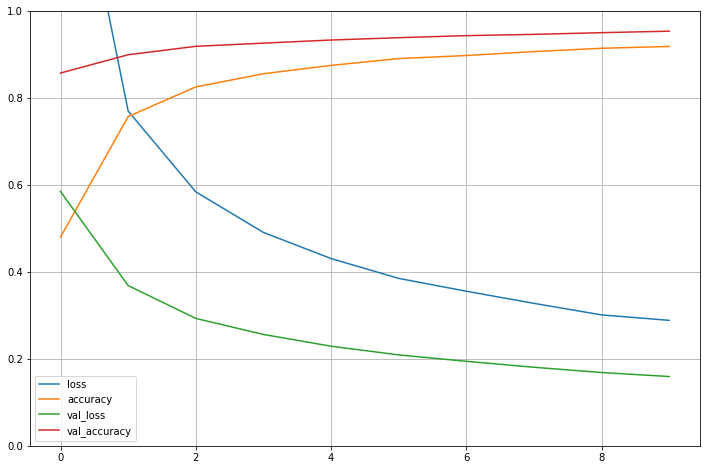

-----------------------------------------------------------------------
313/313 [==============================] - 1s 3ms/step - loss: 0.1600 - accuracy: 0.9521
Loss     :  0.16002178192138672
accuracy :  0.9520999789237976


In [ ]:
# Model subclassing
import tensorflow as tf

class MyModel(tf.keras.Model):

    def __init__(self, H, W, classes):
        super(MyModel, self).__init__()

        self.flatten  = tf.keras.layers.Flatten(input_shape=[H, W])
        self.dense1   = tf.keras.layers.Dense(300,  activation="relu")
        self.dropout1 = tf.keras.layers.Dropout(0.3)
        self.dense2   = tf.keras.layers.Dense(100,  activation="relu")
        self.dropout2 = tf.keras.layers.Dropout(0.3)
        self.dense3   = tf.keras.layers.Dense(50,  activation="relu")
        self.dropout3 = tf.keras.layers.Dropout(0.3)
        self.dense4   = tf.keras.layers.Dense(classes,  activation="softmax")

    def call(self, inputs):
        x = self.flatten(inputs)
        x = self.dense1(x)
        x = self.dropout1(x)
        x = self.dense2(x)
        x = self.dropout2(x)
        x = self.dense3(x)
        x = self.dropout3(x)
        return self.dense4(x)

#-------------------------------------------------------------------------------
"""
Once the model is created, you can config the model with losses and metrics 
with model.compile(), train the model with model.fit(), or use the model 
to do prediction with model.predict().
"""
# MyModel
my_model = MyModel(28, 28, 10)

# Compiling the model
my_model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# Training and evaluating the model
history = my_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# plot the learning curves
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

print("-----------------------------------------------------------------------")
# Evaluate the model
model_evaluate = my_model.evaluate(X_test, y_test)
print("Loss     : ",model_evaluate[0])
print("accuracy : ",model_evaluate[1])

